### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('weatherAUS.csv')

### Exploratory data analysis

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
### Checking for null values
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
# Dropping irrelevant features
df.drop(['RainToday','Date','Location'],axis=1,inplace=True)

In [9]:
df.isnull().sum()
# we can see lot of null values here

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainTomorrow      3267
dtype: int64

### Feature engineering

In [10]:
### Null values imputation
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])


In [11]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

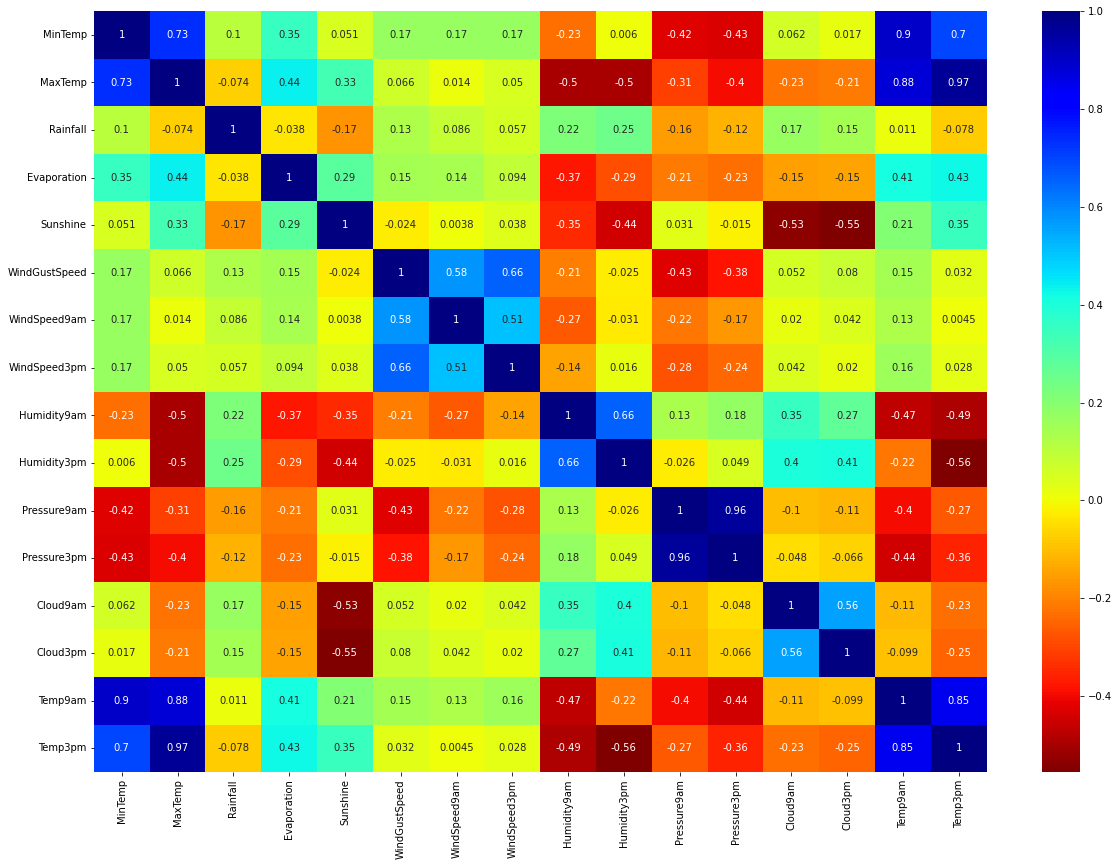

In [12]:
# Plotting correlation heatmap
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,cmap='jet_r')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustDir    145460 non-null  object 
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  object 
 8   WindDir3pm     145460 non-null  object 
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Cloud9am       145460 non-null  float64
 16  Cloud3pm       145460 non-null  float64
 17  Temp9am        145460 non-nul

### Label encoding for categorical values

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustDir    145460 non-null  int32  
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  int32  
 8   WindDir3pm     145460 non-null  int32  
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Cloud9am       145460 non-null  float64
 16  Cloud3pm       145460 non-null  float64
 17  Temp9am        145460 non-nul

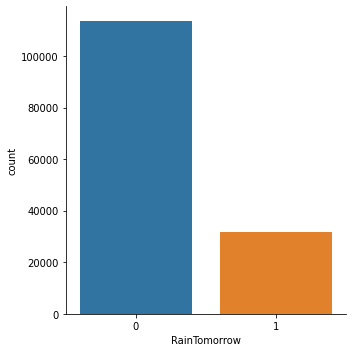

In [16]:
sns.catplot(x='RainTomorrow',data=df,kind="count")
# We can see imbalance of data here

In [17]:
df.RainTomorrow.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [18]:
# Undersampling for balancing our dataset
legit=df[df.RainTomorrow==0]
fraud=df[df.RainTomorrow==1]
legit_sample=legit.sample(n=31877)
df1=pd.concat([legit_sample,fraud],axis=0)

#### Now we are going to use df1 for our project

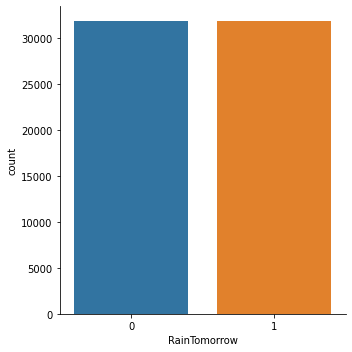

In [19]:
sns.catplot(x='RainTomorrow',data=df1,kind='count')
# We can dataset is balanced now

### Separating dependant and independant variables

In [20]:
X=df1.drop('RainTomorrow',axis=1)
y=df1.RainTomorrow

In [21]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
55924,8.9,17.8,0.0,5.468232,7.611178,12,44.0,15,11,26.0,19.0,83.0,62.0,1013.4,1013.2,7.000000,7.00000,11.2,16.2
131688,9.0,16.2,0.0,2.400000,6.900000,10,28.0,3,9,6.0,20.0,65.0,60.0,1018.1,1015.0,4.447461,4.50993,12.5,15.1
90457,9.9,20.9,0.0,5.468232,7.611178,8,35.0,11,10,15.0,13.0,54.0,50.0,1020.8,1018.4,4.447461,4.50993,16.7,19.3
93843,16.1,26.9,0.0,6.600000,9.500000,1,31.0,1,1,2.0,22.0,62.0,55.0,1020.0,1016.6,1.000000,1.00000,23.0,25.3
94164,9.9,25.2,0.0,5.200000,10.300000,4,26.0,3,4,0.0,19.0,62.0,41.0,1018.9,1015.5,1.000000,1.00000,19.9,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145324,24.8,39.8,0.4,5.468232,7.611178,14,65.0,0,1,15.0,20.0,38.0,24.0,1007.0,1003.6,4.447461,4.50993,31.5,36.6
145390,19.3,24.4,0.0,5.468232,7.611178,13,35.0,2,10,7.0,19.0,28.0,91.0,1015.9,1013.9,8.000000,8.00000,21.3,18.5
145391,15.2,21.5,6.8,5.468232,7.611178,1,30.0,4,1,19.0,9.0,65.0,65.0,1016.9,1015.3,3.000000,8.00000,19.0,21.2
145392,17.7,26.9,12.6,5.468232,7.611178,8,35.0,0,11,15.0,20.0,93.0,59.0,1018.1,1014.7,7.000000,8.00000,19.0,26.0


In [22]:
y

55924     0
131688    0
90457     0
93843     0
94164     0
         ..
145324    1
145390    1
145391    1
145392    1
145393    1
Name: RainTomorrow, Length: 63754, dtype: int32

### Train test split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
from sklearn.metrics import accuracy_score,f1_score
print("Accuracy-score:",accuracy_score(y_test,y_hat))
print("F1-score:",f1_score(y_test,y_hat))

Accuracy-score: 0.779625127440985
F1-score: 0.7770195207109982


### Fitting decision tree classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_hat3=dc.predict(X_test)
print("Accuracy-score:",accuracy_score(y_test,y_hat3))
print("F1-score:",f1_score(y_test,y_hat3))

Accuracy-score: 0.7082581758293467
F1-score: 0.7097378277153559


### Fitting random forest classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_hat4=rc.predict(X_test)
print("Accuracy-score:",accuracy_score(y_test,y_hat4))
print("F1-score:",f1_score(y_test,y_hat4))

Accuracy-score: 0.7982119049486315
F1-score: 0.799282315313207


#### We can use random forest classifier as it gives better accuracy